<a href="https://colab.research.google.com/github/BodaSadalla98/FastAi-C1/blob/main/FastAi_Lesson2(Race-classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Oct  8 14:57:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

! pip install gdown 

### Eithnis

In [3]:
! gdown --id 1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86

Downloading...
From: https://drive.google.com/uc?id=1Z1RqRo0_JiavaZw2yzZG6WETdZQ8qX86
To: /content/fairface-img-margin025-trainval.zip
100% 578M/578M [00:03<00:00, 147MB/s]


In [4]:
!unzip fairface-img-margin025-trainval.zip -n


Streaming output truncated to the last 5000 lines.
  inflating: val/5370.jpg            
  inflating: val/5596.jpg            
  inflating: val/5875.jpg            
  inflating: val/5878.jpg            
  inflating: val/5879.jpg            
  inflating: val/5883.jpg            
  inflating: val/6126.jpg            
  inflating: val/6132.jpg            
  inflating: val/6144.jpg            
  inflating: val/6150.jpg            
  inflating: val/6340.jpg            
  inflating: val/7190.jpg            
  inflating: val/7734.jpg            
  inflating: val/7747.jpg            
  inflating: val/7872.jpg            
  inflating: val/7940.jpg            
  inflating: val/8065.jpg            
  inflating: val/8069.jpg            
  inflating: val/8125.jpg            
  inflating: val/8202.jpg            
  inflating: val/8204.jpg            
  inflating: val/8205.jpg            
  inflating: val/8268.jpg            
  inflating: val/8270.jpg            
  inflating: val/8281.jpg            

In [5]:
# train labels 

!gdown --id 1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH

# val labels 
!gdown --id 1wOdja-ezstMEp81tX1a-EYkFebev4h7D

Downloading...
From: https://drive.google.com/uc?id=1i1L3Yqwaio7YSOCj7ftgk8ZZchPG7dmH
To: /content/fairface_label_train.csv
100% 3.79M/3.79M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wOdja-ezstMEp81tX1a-EYkFebev4h7D
To: /content/fairface_label_val.csv
100% 448k/448k [00:00<00:00, 66.1MB/s]


In [6]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 455 kB 5.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
voila 0.2.16 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


In [7]:
import pandas as pd 
import os 
from shutil import copy2
from tqdm import tqdm


TRAIN = False

In [8]:
labels = pd.read_csv('fairface_label_train.csv',header=0)

In [9]:
len(labels)

86744

In [10]:
images = os.listdir('train')

print(len(images))

86744


In [11]:
races = labels['race'].unique()

print(races)

['East Asian' 'Indian' 'Black' 'White' 'Middle Eastern' 'Latino_Hispanic' 'Southeast Asian']


In [12]:
! rm -rf dataset/

In [13]:

path = Path('dataset')
train = Path('train')
if not path.exists():
  path.mkdir()
  for race in races:
    dest = (path/race)
    dest.mkdir() 

In [14]:
print(random.random())

0.6394267984578837


In [15]:
for _,image in tqdm(labels.iterrows()):
  # print(image)
  image_name = image.file
  image_race = image.race
  
  dest = Path(path/image_race)
  source = Path(image_name)
  if random.random() > 0.90:
    copy2(source,dest)
  


86744it [00:19, 4428.81it/s]


In [16]:
??DataBlock

In [17]:
images = DataBlock( blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(valid_pct=0.2, seed = 7),
                   get_y=parent_label
                  #  item_tfms= Resize(128) 
                   
                   )

In [18]:
data_loaders = images.dataloaders(path)

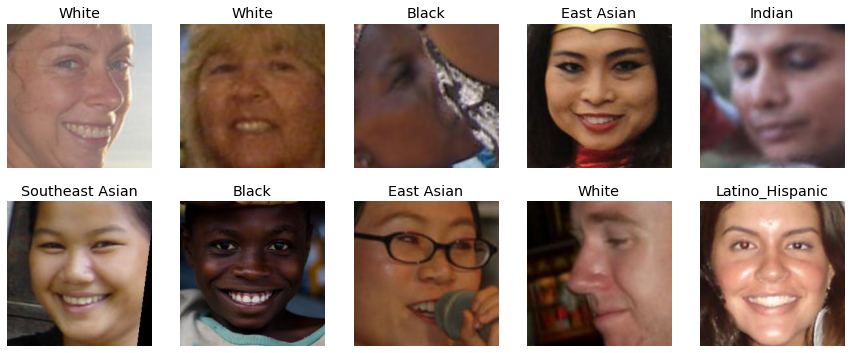

In [19]:
data_loaders.train.show_batch(max_n=10, nrows=2)


### Data Augmentation

In [20]:
# images = images.new(item_tfms= RandomResizedCrop(224,min_scale=0.6), batch_tfms= aug_transforms())

# data_loaders = images.dataloaders(path, batch_size=64)



In [21]:
print( len(data_loaders.train) )

110


In [22]:
  # learn = cnn_learner( data_loaders, resnet18, metrics=error_rate)


  # learn.fine_tune(4)



In [23]:
# learn = cnn_learner( data_loaders, resnet50, metrics=error_rate)


# learn.fine_tune(4)

In [24]:
# images = images.new(item_tfms= RandomResizedCrop(224,min_scale=0.5), batch_tfms= aug_transforms())

data_loaders = images.dataloaders(path, batch_size=64)

learn = cnn_learner( data_loaders, resnet18, metrics=error_rate)



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [28]:
if TRAIN:
  learn.fine_tune(8)
  interp = ClassificationInterpretation.from_learner(learn)
  interp.plot_confusion_matrix()
  interp.plot_top_losses(5, nrows=5)

else:
  !gdown --id  1anHAluKGq1W-sKEZklU-oMf8H7Tq_hL1
  learn  = load_learner('race_calssifier.pkl')

Downloading...
From: https://drive.google.com/uc?id=1anHAluKGq1W-sKEZklU-oMf8H7Tq_hL1
To: /content/race_calssifier.pkl
100% 47.1M/47.1M [00:00<00:00, 178MB/s]


In [29]:
## Saving Model to drive

# learn.export(fname='race_calssifier.pkl')
# !cp race_calssifier.pkl  gdrive/MyDrive/Models/ 

In [30]:
btn_upload = widgets.FileUpload()
btn_classify = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [31]:
def on_click_classify(change):
  
  out_pl.clear_output()
  lbl_pred.value = ''
  if len(btn_upload.data) > 0:
    img = PILImage.create(btn_upload.data[-1])
    pred,pred_idx,probs = learn.predict(img)

    
    with out_pl: display(img.to_thumb(128,128))
    
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
  else:

    lbl_pred.value = 'Please upload an image first!'



btn_classify.on_click(on_click_classify)

In [32]:
VBox([widgets.Label('Select your Face image!'), 
      btn_upload, btn_classify, out_pl, lbl_pred])

In [ ]:
!pip install voila



In [35]:
!jupyter serverextension enable voila --sys-prefix

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
